In [13]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from neurasort.bio482.helpers import *

import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
raw_data = pd.read_pickle("data_bio482.pkl")

In [4]:
data_processed = raw_data.drop(["Sweep_PassiveContactTimes", "Sweep_ActiveContactTimes"], axis=1)
data_processed

,Cell_APThreshold_Slope,Cell_Anatomy,Cell_Counter,Cell_Depth,Cell_ID,Cell_Layer,Cell_TargetedBrainArea,Cell_Type,Cell_tdTomatoExpressing,Mouse_DateOfBirth,...,Mouse_Sex,Sweep_Counter,Sweep_MembranePotential,Sweep_MembranePotential_SamplingRate,Sweep_QuietTimes,Sweep_StartTime,Sweep_Type,Sweep_WhiskerAngle,Sweep_WhiskerAngle_SamplingRate,Sweep_WhiskingTimes
0,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,1.0,"[-0.044009375, -0.044028125, -0.0439875, -0.04...",20000.0,"[[0.002, 4.564], [4.606, 6.09], [14.634, 15.52...",2005.0,active touch,"[2.740000000000009, 2.740000000000009, 2.74000...",100.0,"[[6.118, 6.326], [7.942, 13.856]]"
1,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,2.0,"[-0.046275, -0.04629375, -0.046259375, -0.0462...",20000.0,"[[0.002, 4.496], [5.558, 6.626], [13.406, 15.2...",2005.0,active touch,"[2.680000000000007, 2.680000000000007, 2.68000...",100.0,"[[4.7, 5.196], [6.696, 11.15], [12.032, 13.006..."
2,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,3.0,"[-0.041896875, -0.0419125, -0.041909375, -0.04...",20000.0,"[[0.002, 2.128], [6.252, 7.01], [7.15, 20.0]]",2005.0,passive contact,"[1.4958937492820894, 1.5019819900587095, 1.509...",100.0,"[[2.15, 3.652], [4.362, 5.848]]"
3,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,4.0,"[-0.04655625, -0.0465875, -0.046575, -0.046596...",20000.0,"[[0.002, 2.764], [12.03, 14.464], [14.814, 15....",2005.0,active touch,"[2.467493802679826, 2.459711310964792, 2.46562...",100.0,"[[2.766, 12.026], [15.626, 18.406], [18.814, 1..."
4,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,5.0,"[-0.047296875, -0.047284375, -0.047265625, -0....",20000.0,"[[0.002, 3.36], [3.57, 4.424], [4.48, 5.224], ...",2005.0,active touch,"[2.4399999999999977, 2.4399999999999977, 2.440...",100.0,"[[5.228, 5.624], [7.462, 8.022], [11.002, 15.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,23.0,"[-0.059725001, -0.0597375, -0.059731249, -0.05...",20000.0,"[[0.002, 10.728], [17.854, 20.0]]",2015.0,free whisking,"[-139.2381, -139.2381, -139.2381, -139.2381, -...",100.0,"[11.022, 16.274]"
827,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,24.0,"[-0.058984376, -0.058984376, -0.058990624, -0....",20000.0,"[[0.002, 0.238], [1.162, 3.608], [4.906, 6.216...",2015.0,free whisking,"[-144.9738, -144.9738, -144.9738, -145.6111, -...",100.0,"[[0.264, 1.158], [3.694, 4.776], [8.728, 9.896..."
828,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,25.0,"[-0.053018749, -0.05298125, -0.05300625, -0.05...",20000.0,"[[0.002, 1.74], [1.844, 6.52], [6.532, 9.15], ...",2015.0,free whisking,"[-150.0723, -150.0723, -150.0723, -150.0723, -...",100.0,"[[9.166, 9.878], [10.358, 12.526], [12.958, 13..."
829,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,26.0,"[-0.049796876, -0.049843751, -0.049878124, -0....",20000.0,"[[0.002, 0.146], [0.53, 1.858], [2.408, 3.664]...",2015.0,free whisking,"[-144.9738, -144.9738, -144.9738, -145.6111, -...",100.0,"[[0.222, 0.526], [1.892, 2.404], [3.692, 3.818..."


In [5]:
columns_with_arrays = [
    "Sweep_MembranePotential",
    "Sweep_QuietTimes",
    "Sweep_WhiskerAngle",
    "Sweep_WhiskingTimes",
]

In [6]:
data_processed[data_processed.columns.difference(columns_with_arrays)] = data_processed[data_processed.columns.difference(columns_with_arrays)].replace('nan', np.nan)

In [7]:
data_processed

,Cell_APThreshold_Slope,Cell_Anatomy,Cell_Counter,Cell_Depth,Cell_ID,Cell_Layer,Cell_TargetedBrainArea,Cell_Type,Cell_tdTomatoExpressing,Mouse_DateOfBirth,...,Mouse_Sex,Sweep_Counter,Sweep_MembranePotential,Sweep_MembranePotential_SamplingRate,Sweep_QuietTimes,Sweep_StartTime,Sweep_Type,Sweep_WhiskerAngle,Sweep_WhiskerAngle_SamplingRate,Sweep_WhiskingTimes
0,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,1.0,"[-0.044009375, -0.044028125, -0.0439875, -0.04...",20000.0,"[[0.002, 4.564], [4.606, 6.09], [14.634, 15.52...",2005.0,active touch,"[2.740000000000009, 2.740000000000009, 2.74000...",100.0,"[[6.118, 6.326], [7.942, 13.856]]"
1,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,2.0,"[-0.046275, -0.04629375, -0.046259375, -0.0462...",20000.0,"[[0.002, 4.496], [5.558, 6.626], [13.406, 15.2...",2005.0,active touch,"[2.680000000000007, 2.680000000000007, 2.68000...",100.0,"[[4.7, 5.196], [6.696, 11.15], [12.032, 13.006..."
2,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,3.0,"[-0.041896875, -0.0419125, -0.041909375, -0.04...",20000.0,"[[0.002, 2.128], [6.252, 7.01], [7.15, 20.0]]",2005.0,passive contact,"[1.4958937492820894, 1.5019819900587095, 1.509...",100.0,"[[2.15, 3.652], [4.362, 5.848]]"
3,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,4.0,"[-0.04655625, -0.0465875, -0.046575, -0.046596...",20000.0,"[[0.002, 2.764], [12.03, 14.464], [14.814, 15....",2005.0,active touch,"[2.467493802679826, 2.459711310964792, 2.46562...",100.0,"[[2.766, 12.026], [15.626, 18.406], [18.814, 1..."
4,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,5.0,"[-0.047296875, -0.047284375, -0.047265625, -0....",20000.0,"[[0.002, 3.36], [3.57, 4.424], [4.48, 5.224], ...",2005.0,active touch,"[2.4399999999999977, 2.4399999999999977, 2.440...",100.0,"[[5.228, 5.624], [7.462, 8.022], [11.002, 15.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,20.0,NaN,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,23.0,"[-0.059725001, -0.0597375, -0.059731249, -0.05...",20000.0,"[[0.002, 10.728], [17.854, 20.0]]",2015.0,free whisking,"[-139.2381, -139.2381, -139.2381, -139.2381, -...",100.0,"[11.022, 16.274]"
827,20.0,NaN,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,24.0,"[-0.058984376, -0.058984376, -0.058990624, -0....",20000.0,"[[0.002, 0.238], [1.162, 3.608], [4.906, 6.216...",2015.0,free whisking,"[-144.9738, -144.9738, -144.9738, -145.6111, -...",100.0,"[[0.264, 1.158], [3.694, 4.776], [8.728, 9.896..."
828,20.0,NaN,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,25.0,"[-0.053018749, -0.05298125, -0.05300625, -0.05...",20000.0,"[[0.002, 1.74], [1.844, 6.52], [6.532, 9.15], ...",2015.0,free whisking,"[-150.0723, -150.0723, -150.0723, -150.0723, -...",100.0,"[[9.166, 9.878], [10.358, 12.526], [12.958, 13..."
829,20.0,NaN,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,26.0,"[-0.049796876, -0.049843751, -0.049878124, -0....",20000.0,"[[0.002, 0.146], [0.53, 1.858], [2.408, 3.664]...",2015.0,free whisking,"[-144.9738, -144.9738, -144.9738, -145.6111, -...",100.0,"[[0.222, 0.526], [1.892, 2.404], [3.692, 3.818..."


In [8]:
data_free_whisking = data_processed[data_processed['Sweep_Type']=='free whisking']

<Axes: >

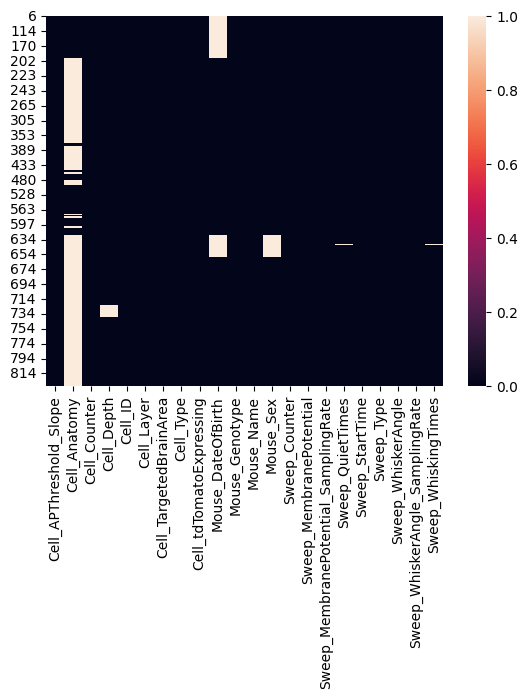

In [9]:
sns.heatmap(data_free_whisking.isna())

In [11]:
time_window = 2    # time window to analyze Vm (s)
freq_band_lim = [1, 10, 30, 90] # low- and high-frequency band limits (Hz)

In [12]:
# Initialize a dictionary to store data for all cells
result_dict = {
    #'cell_id' : [],
    'cell_type': [],
    'firing_rate': [],
    'ap_threshold': [],
    'ap_duration': [],
    'mean_vm': [],
    'std_vm': [],
    'fft_low': [],
    'fft_high': [],
    'Cell_APThreshold_Slope' : [],
    'Cell_Depth' : [],
    'Cell_Layer' : [],
    'Cell_tdTomatoExpressing' : []
}

result_fft_cell_type = {'EXC': [], 'SST': [], 'VIP': [], 'PV': []}

# Iterate over each row in the DataFrame
for idx, cell_row in data_free_whisking.iterrows():

    # Get cell ID and other relevant information from the row
    #cell_id = cell_row['Cell_ID']
    cell_type = cell_row['Cell_Type']
    sr_vm = cell_row['Sweep_MembranePotential_SamplingRate']
    membrane_potential = cell_row['Sweep_MembranePotential']
    ap_vm_deriv_thresh = cell_row['Cell_APThreshold_Slope']
    Cell_APThreshold_Slope = cell_row['Cell_APThreshold_Slope']
    Cell_Depth = cell_row['Cell_Depth']
    Cell_Layer = cell_row['Cell_Layer']
    Cell_tdTomatoExpressing = cell_row['Cell_tdTomatoExpressing']

    # Init. cell recording specific quantities: a unique duration, yielding a unique number of APs
    tot_rec_duration = len(membrane_potential)/sr_vm
    tot_number_ap = 0

    # Initialize empty lists to get data for each trial/sweep
    tot_ap_thresh = []
    tot_ap_duration = []
    tot_mean_vm = []
    tot_std_vm = []
    tot_fft = []

    # Detection of action potentials for that trial, and update total number of APs for that cell
    ap_params = Function_Detect_APs(membrane_potential, sr_vm, ap_vm_deriv_thresh)
    tot_number_ap += ap_params.shape[0]

    # Check if this trial contains any AP...
    ap_duration = []
    if ap_params.any():
        ap_thresh_times = ap_params[:, 0]
        ap_thresh_vm = ap_params[:, 1]
        ap_peak_times = ap_params[:, 2]
        ap_peak_vm = ap_params[:, 3]
        ap_duration = ap_params[:, 5]

        # Cut-out individual APs to keep subthreshold Vm only
        vm_sub = Function_CutAPs(membrane_potential, sr_vm, ap_peak_times, ap_thresh_times)
    else:
        # If no AP, subthreshold Vm is just Vm
        ap_duration = [0]
        ap_thresh_vm = [0]
        vm_sub = membrane_potential.copy()

    # Once Vm_sub is obtained:
    # Compute subthreshold Vm mean and standard deviation
    mean_vm, std_vm = Function_SubThrsVm(vm_sub, sr_vm, tot_rec_duration)

    # Compute trial FFT
    fft = Function_Compute_FFTs(vm_sub, sr_vm, time_window)

    # Append data for each trial to the result dictionary
    #result_dict['cell_id'].append(cell_id)
    result_dict['cell_type'].append(cell_type)
    result_dict['firing_rate'].append(tot_number_ap / tot_rec_duration)
    result_dict['ap_threshold'].append(np.nanmean(np.array(ap_thresh_vm)))
    result_dict['ap_duration'].append(np.nanmean(np.array(ap_duration)))
    result_dict['mean_vm'].append(np.nanmean(np.array(mean_vm)))
    result_dict['std_vm'].append(np.nanmean(np.array(std_vm)))
    result_dict['Cell_APThreshold_Slope'].append(Cell_APThreshold_Slope)
    result_dict['Cell_Depth'].append(Cell_Depth)
    result_dict['Cell_Layer'].append(Cell_Layer)
    result_dict['Cell_tdTomatoExpressing'].append(Cell_tdTomatoExpressing)

    # We need to find which point (sample) in the FFT correspond to which frequency
    pt1 = int(freq_band_lim[0] * fft.shape[0] / (sr_vm / 2)) + 1  # 1Hz into FFT point
    pt2 = int(freq_band_lim[1] * fft.shape[0] / (sr_vm / 2)) + 1
    result_dict['fft_high'].append(np.array(fft)[pt1:pt2].mean())

    pt3 = int(freq_band_lim[2] * fft.shape[0] / (sr_vm / 2)) + 1
    pt4 = int(freq_band_lim[3] * fft.shape[0] / (sr_vm / 2)) + 1
    result_dict['fft_low'].append(np.array(fft)[pt3:pt4].mean())

# Convert the result dictionary to a DataFrame
result_df = pd.DataFrame(result_dict)


/Users/wesleymonteith/code/bio482_cell_classifier/neurasort/bio482/helpers.py:18: RuntimeWarning: invalid value encountered in divide
  AP_Thrs_Onset = np.diff(np.divide(Vm_Deriv - Vm_Deriv_Thrs, np.abs(Vm_Deriv - Vm_Deriv_Thrs)))
/Users/wesleymonteith/code/bio482_cell_classifier/neurasort/bio482/helpers.py:52: RuntimeWarning: invalid value encountered in divide
  sAP_OnOff = np.diff(np.divide(sAP_Seg, np.abs(sAP_Seg)))  # compute the binary signal


In [14]:
result_df

,cell_type,firing_rate,ap_threshold,ap_duration,mean_vm,std_vm,fft_low,fft_high,Cell_APThreshold_Slope,Cell_Depth,Cell_Layer,Cell_tdTomatoExpressing
0,EXC,3.25,-0.028422,0.563846,-0.038375,0.005196,0.000043,0.000518,10.0,229.0,L2/3,False
1,EXC,0.20,-0.033953,1.012500,-0.049049,0.004335,0.000053,0.000485,10.0,350.0,L2/3,False
2,EXC,0.05,-0.039291,3.350000,-0.050940,0.005286,0.000063,0.000519,10.0,350.0,L2/3,False
3,EXC,0.00,0.000000,0.000000,-0.047544,0.004778,0.000057,0.000557,10.0,350.0,L2/3,False
4,EXC,0.15,-0.033361,1.733333,-0.046490,0.002881,0.000031,0.000403,10.0,244.0,L2/3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
492,SST,6.60,-0.047992,0.564015,-0.056633,0.003752,0.000066,0.000438,20.0,196.0,L2/3,True
493,SST,6.80,-0.047427,0.578676,-0.056827,0.004175,0.000071,0.000514,20.0,196.0,L2/3,True
494,SST,7.50,-0.047400,0.589667,-0.056011,0.004038,0.000067,0.000460,20.0,196.0,L2/3,True
495,SST,5.50,-0.048279,0.580455,-0.056918,0.003525,0.000054,0.000430,20.0,196.0,L2/3,True


In [15]:
questionable_predictors = [
    # 'Cell_APThreshold_Slope',
    'Cell_Anatomy',
    'Cell_Counter',
    # 'Cell_Depth',
    'Cell_ID',
    # 'Cell_Layer',
    'Cell_TargetedBrainArea',
    # 'Cell_Type',
    # 'Cell_tdTomatoExpressing',
    'Mouse_DateOfBirth',
    'Mouse_Genotype',
    'Mouse_Name',
    'Mouse_Sex',
    'Sweep_Counter',
    'Sweep_MembranePotential', # Array
    'Sweep_MembranePotential_SamplingRate',
    'Sweep_QuietTimes', # Array
    'Sweep_StartTime',
    'Sweep_Type',
    'Sweep_WhiskerAngle', # Array
    'Sweep_WhiskerAngle_SamplingRate',
    'Sweep_WhiskingTimes' # Array
]

keep_predictors = [
    'Cell_APThreshold_Slope',
    # 'Cell_Anatomy',
    # 'Cell_Counter',
    'Cell_Depth',
    # 'Cell_ID',
    'Cell_Layer',
    # 'Cell_TargetedBrainArea',
    'Cell_Type',
    'Cell_tdTomatoExpressing',
    # 'Mouse_DateOfBirth',
    # 'Mouse_Genotype',
    # 'Mouse_Name',
    # 'Mouse_Sex',
    # 'Sweep_Counter',
    # 'Sweep_MembranePotential', # Array
    # 'Sweep_MembranePotential_SamplingRate',
    # 'Sweep_QuietTimes', # Array
    # 'Sweep_StartTime',
    # 'Sweep_Type',
    # 'Sweep_WhiskerAngle', # Array
    # 'Sweep_WhiskerAngle_SamplingRate',
    # 'Sweep_WhiskingTimes' # Array
]

<Axes: >

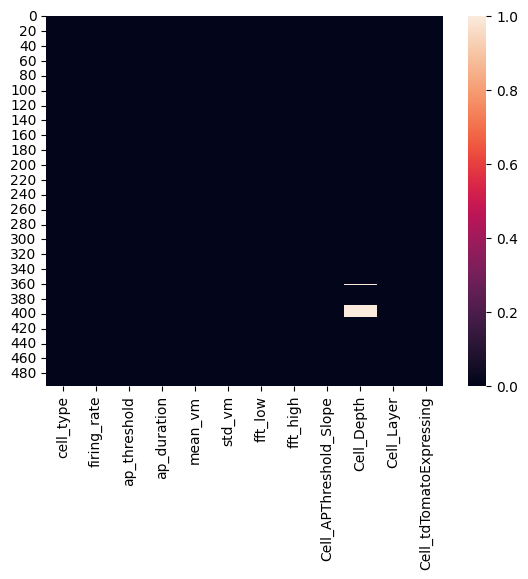

In [16]:
sns.heatmap(result_df.isna())

<Axes: ylabel='Cell_Depth'>

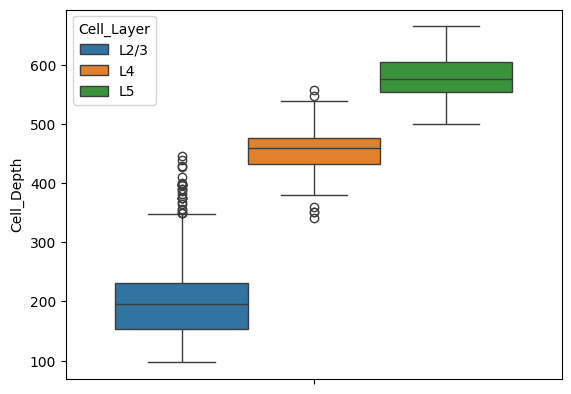

In [17]:
sns.boxplot(
    data=result_df,
    y="Cell_Depth",
    hue="Cell_Layer"
)

In [24]:
result_df

,cell_type,firing_rate,ap_threshold,ap_duration,mean_vm,std_vm,fft_low,fft_high,Cell_APThreshold_Slope,Cell_Depth,Cell_Layer,Cell_tdTomatoExpressing
0,EXC,3.25,-0.028422,0.563846,-0.038375,0.005196,0.000043,0.000518,10.0,229.0,L2/3,False
1,EXC,0.20,-0.033953,1.012500,-0.049049,0.004335,0.000053,0.000485,10.0,350.0,L2/3,False
2,EXC,0.05,-0.039291,3.350000,-0.050940,0.005286,0.000063,0.000519,10.0,350.0,L2/3,False
3,EXC,0.00,0.000000,0.000000,-0.047544,0.004778,0.000057,0.000557,10.0,350.0,L2/3,False
4,EXC,0.15,-0.033361,1.733333,-0.046490,0.002881,0.000031,0.000403,10.0,244.0,L2/3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
492,SST,6.60,-0.047992,0.564015,-0.056633,0.003752,0.000066,0.000438,20.0,196.0,L2/3,True
493,SST,6.80,-0.047427,0.578676,-0.056827,0.004175,0.000071,0.000514,20.0,196.0,L2/3,True
494,SST,7.50,-0.047400,0.589667,-0.056011,0.004038,0.000067,0.000460,20.0,196.0,L2/3,True
495,SST,5.50,-0.048279,0.580455,-0.056918,0.003525,0.000054,0.000430,20.0,196.0,L2/3,True


In [25]:
ohe_scaler = make_column_transformer(
    (OneHotEncoder(sparse_output=False, drop="if_binary"), ["Cell_tdTomatoExpressing", "Cell_Layer"]),
    (MinMaxScaler(), ["Cell_APThreshold_Slope", "Cell_Depth", "firing_rate", "ap_duration", "std_vm", "fft_low", "fft_high"]),
    (StandardScaler(), ["ap_threshold", "mean_vm"]),
    remainder="drop",
    verbose_feature_names_out=False,  # avoid to prepend the preprocessor names
)
constant_remover = VarianceThreshold(threshold=0.)
cell_depth_imputer = IterativeImputer(max_iter=10, random_state=0)

ohe_scaler.set_output(transform="pandas")
constant_remover.set_output(transform="pandas")
cell_depth_imputer.set_output(transform="pandas")

preprocess_pipe = Pipeline(
    (
        ("OHE & scaling", ohe_scaler),
        ("remove constants", constant_remover),
        ("impute cell depth", cell_depth_imputer),
    )
)

data_ohe_scaled_constant_free_filled = preprocess_pipe.fit_transform(result_df)


data_ohe_scaled_constant_free_filled['cell_type'] = result_df['cell_type']
data_ohe_scaled_constant_free_filled

,Cell_tdTomatoExpressing_True,Cell_Layer_L2/3,Cell_Layer_L4,Cell_Layer_L5,Cell_APThreshold_Slope,Cell_Depth,firing_rate,ap_duration,std_vm,fft_low,fft_high,ap_threshold,mean_vm,cell_type
0,0.0,1.0,0.0,0.0,0.25,0.232394,0.017344,0.102517,0.422821,0.257585,0.297973,0.945152,2.932638,EXC
1,0.0,1.0,0.0,0.0,0.25,0.445423,0.001067,0.184091,0.338408,0.341667,0.275326,0.431527,0.925393,EXC
2,0.0,1.0,0.0,0.0,0.25,0.445423,0.000267,0.609091,0.431585,0.433209,0.298462,-0.064111,0.569710,EXC
3,0.0,1.0,0.0,0.0,0.25,0.445423,0.000000,0.000000,0.381808,0.377532,0.325379,3.584400,1.208404,EXC
4,0.0,1.0,0.0,0.0,0.25,0.258803,0.000800,0.315152,0.195782,0.158183,0.218183,0.486469,1.406541,EXC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,1.0,1.0,0.0,0.0,0.50,0.174296,0.035222,0.102548,0.281175,0.452887,0.242737,-0.872088,-0.500789,SST
493,1.0,1.0,0.0,0.0,0.50,0.174296,0.036289,0.105214,0.322678,0.498742,0.295543,-0.819636,-0.537235,SST
494,1.0,1.0,0.0,0.0,0.50,0.174296,0.040025,0.107212,0.309284,0.461649,0.257693,-0.817149,-0.383761,SST
495,1.0,1.0,0.0,0.0,0.50,0.174296,0.029352,0.105537,0.259009,0.352021,0.237286,-0.898802,-0.554376,SST


In [26]:
pca = PCA()
pca.set_output(transform="pandas")
pca_data = pca.fit_transform(data_ohe_scaled_constant_free_filled.drop('cell_type', axis=1))
pca_data['cell_type'] = data_ohe_scaled_constant_free_filled['cell_type']
pca_data

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,cell_type
0,-2.757674,-1.033937,0.025339,1.186116,-0.409901,-0.156136,-0.028738,0.148863,-0.026493,0.021211,-0.152439,0.047716,-2.029103e-15,EXC
1,-0.949881,-0.105231,-0.169168,0.911943,-0.214344,-0.095956,-0.154496,-0.014730,0.106530,-0.010055,-0.043634,0.011915,5.327977e-15,EXC
2,-0.349426,-0.249152,-0.281507,0.947489,-0.191408,-0.051822,-0.016471,-0.091962,0.113624,-0.310982,0.195354,0.017827,1.108107e-14,EXC
3,-3.239000,1.978423,0.303389,0.621089,-0.325885,0.292517,-0.147815,-0.069746,0.154173,0.009019,-0.083952,0.012069,-1.364662e-16,EXC
4,-1.353077,-0.352196,-0.169149,1.006617,-0.178940,-0.325826,-0.100803,0.136882,-0.008329,-0.102314,0.024239,-0.058825,-3.687024e-16,EXC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,0.854636,-0.325292,-0.519642,-0.240547,0.114930,-0.180387,-0.158435,0.010473,-0.037939,-0.013623,-0.010884,0.008882,7.747653e-17,SST
493,0.849948,-0.271360,-0.519193,-0.258483,0.087495,-0.109799,-0.127296,-0.014477,-0.038222,-0.016010,-0.013884,-0.001447,7.990959e-17,SST
494,0.735074,-0.364575,-0.502076,-0.225433,0.095353,-0.155688,-0.138626,0.011057,-0.034060,-0.017471,-0.011282,0.016494,6.468060e-17,SST
495,0.908691,-0.298904,-0.526944,-0.231598,0.157617,-0.240759,-0.137164,0.073451,-0.014800,-0.005847,-0.018518,0.003219,1.075586e-16,SST


<Axes: xlabel='pca0', ylabel='pca1'>

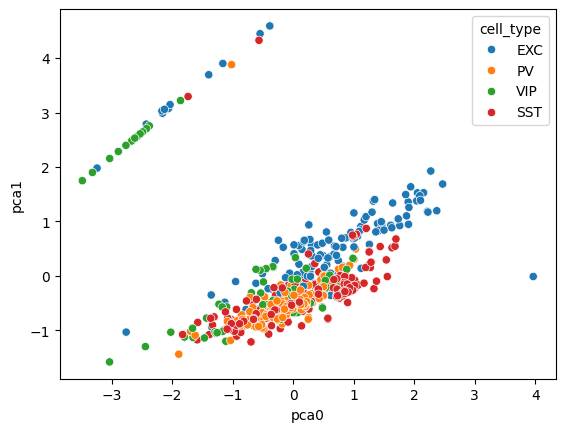

In [28]:
sns.scatterplot(
    data=pca_data,
    x='pca0',
    y='pca1',
    hue='cell_type'
)

In [33]:
import plotly.express as px
fig = px.scatter_3d(pca_data, x='pca0', y='pca1', z='pca2',
              color='cell_type'
              
              )
fig.show()